In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('motor_second.csv')

In [65]:
df.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


In [66]:
current_year = 2024

In [67]:
df['usia'] = current_year - df['tahun']

In [68]:
df['harga_per_km'] = df['harga'] / df['odometer']

In [69]:
df['efisiensi_pajak'] = df['pajak'] / df['harga']

In [70]:
df['kategori_harga'] = pd.cut(df['harga'], bins=[0, 8000, 12000, float('inf')], labels=['rendah', 'sedang', 'tinggi'])


In [71]:
df['transmisi'] = label_encoder.fit_transform(df['transmisi'])
df['model'] = label_encoder.fit_transform(df['model'])
df['jenis'] = label_encoder.fit_transform(df['jenis'])
df['kategori_harga'] = label_encoder.fit_transform(df['kategori_harga'])


In [72]:
df.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin,usia,harga_per_km,efisiensi_pajak,kategori_harga
0,10,2017,7999,2,17307,0,145.0,58.9,125.0,7,0.462183,0.018127,0
1,11,2016,14499,0,25233,1,235.0,43.5,125.0,8,0.574605,0.016208,2
2,11,2016,11399,0,37877,1,30.0,61.7,125.0,8,0.300948,0.002632,1
3,7,2016,6499,2,23789,0,20.0,60.1,110.0,8,0.273193,0.003077,0
4,6,2015,10199,0,33177,1,160.0,51.4,150.0,9,0.307412,0.015688,1


In [73]:
X = df.drop('jenis', axis=1)
y = df['jenis']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = model.predict(X_test)

In [78]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        20
           2       1.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.98      0.67      0.66        40
weighted avg       0.98      0.97      0.96        40



Confusion Matrix:


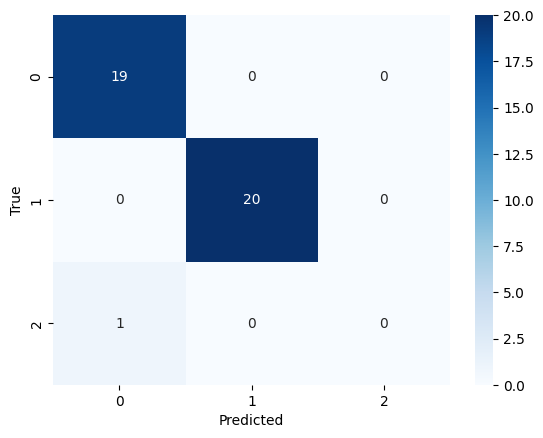

In [79]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [80]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.975


In [81]:
feature_importances = model.feature_importances_
features = X.columns

In [82]:
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


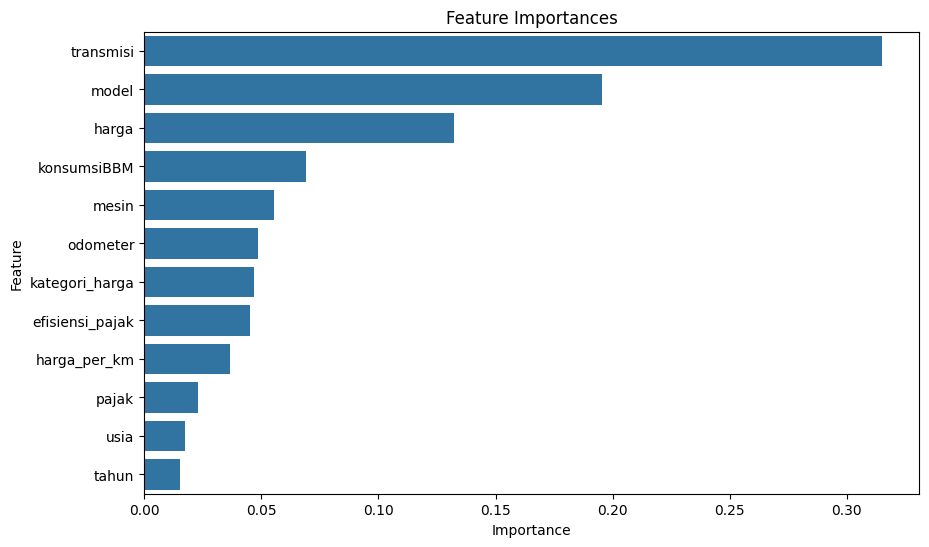

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()